# import

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
%matplotlib inline

# path to string

In [4]:
path = r'C:\Users\leevg\OneDrive\Desktop\CF\DI\A6'

# import data

In [5]:
df = pd.read_csv(os.path.join(path, 'Data', 'Prepared Data', 'TSA Claims Task 6.2.csv'))

In [6]:
df.head(20)

,Unnamed: 0,Date Received,Incident Date,State,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition,Close Category
0,0,6/20/02,5/9/02,Maryland,Baltimore/Washington Intl Thurgood Marshall,Southwest Airlines,Other,Checkpoint,Clothing,75.00,Approved,75.00,Approve in Full,Medium Price
1,1,6/20/02,6/16/02,Arizona,Phoenix Sky Harbor International,Other,Property Damage,Checkpoint,Computers,2270.09,Canceled,0.00,Cancel,Low price
2,2,6/25/02,5/4/02,Georgia,Hartsfield-Jackson Atlanta International Airport,Other,Passenger Property Loss,Checkpoint,Jewelry,4457.29,Denied,0.00,Deny,Low price
3,3,7/8/02,6/12/02,Maryland,Baltimore/Washington Intl Thurgood Marshall,American Airlines,Other,Checkpoint,Glasses & Contacts,16.71,Approved,17.00,Approve in Full,Low price
4,4,7/8/02,6/4/02,Maryland,Baltimore/Washington Intl Thurgood Marshall,Southwest Airlines,Other,Other,Clothing,450.00,Canceled,0.00,Cancel,Low price
5,5,7/12/02,5/31/02,Maryland,Baltimore/Washington Intl Thurgood Marshall,American Airlines,Other,Other,Luggage,200.00,Denied,0.00,Deny,Low price
6,6,7/12/02,6/12/02,Maryland,Baltimore/Washington Intl Thurgood Marshall,Other,Other,Other,Luggage,50.00,Denied,0.00,Deny,Low price
7,7,7/24/02,7/10/02,Kentucky,Louisville International,Delta Air Lines,Passenger Property Loss,Checkpoint,Luggage,600.00,Settled,337.40,Settle,High Price
8,8,8/12/02,7/19/02,Maryland,Baltimore/Washington Intl Thurgood Marshall,Delta Air Lines,Other,Other,Luggage,380.00,Canceled,0.00,Cancel,Low price
9,9,8/19/02,6/22/02,Maryland,Baltimore/Washington Intl Thurgood Marshall,America West,Property Damage,Checkpoint,Glasses & Contacts,354.93,Settled,301.69,Settle,High Price


In [7]:
df = df.drop(columns = 'Unnamed: 0')

In [8]:
df.head(20)

,Date Received,Incident Date,State,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition,Close Category
0,6/20/02,5/9/02,Maryland,Baltimore/Washington Intl Thurgood Marshall,Southwest Airlines,Other,Checkpoint,Clothing,75.00,Approved,75.00,Approve in Full,Medium Price
1,6/20/02,6/16/02,Arizona,Phoenix Sky Harbor International,Other,Property Damage,Checkpoint,Computers,2270.09,Canceled,0.00,Cancel,Low price
2,6/25/02,5/4/02,Georgia,Hartsfield-Jackson Atlanta International Airport,Other,Passenger Property Loss,Checkpoint,Jewelry,4457.29,Denied,0.00,Deny,Low price
3,7/8/02,6/12/02,Maryland,Baltimore/Washington Intl Thurgood Marshall,American Airlines,Other,Checkpoint,Glasses & Contacts,16.71,Approved,17.00,Approve in Full,Low price
4,7/8/02,6/4/02,Maryland,Baltimore/Washington Intl Thurgood Marshall,Southwest Airlines,Other,Other,Clothing,450.00,Canceled,0.00,Cancel,Low price
5,7/12/02,5/31/02,Maryland,Baltimore/Washington Intl Thurgood Marshall,American Airlines,Other,Other,Luggage,200.00,Denied,0.00,Deny,Low price
6,7/12/02,6/12/02,Maryland,Baltimore/Washington Intl Thurgood Marshall,Other,Other,Other,Luggage,50.00,Denied,0.00,Deny,Low price
7,7/24/02,7/10/02,Kentucky,Louisville International,Delta Air Lines,Passenger Property Loss,Checkpoint,Luggage,600.00,Settled,337.40,Settle,High Price
8,8/12/02,7/19/02,Maryland,Baltimore/Washington Intl Thurgood Marshall,Delta Air Lines,Other,Other,Luggage,380.00,Canceled,0.00,Cancel,Low price
9,8/19/02,6/22/02,Maryland,Baltimore/Washington Intl Thurgood Marshall,America West,Property Damage,Checkpoint,Glasses & Contacts,354.93,Settled,301.69,Settle,High Price


In [9]:
df.shape

(139201, 13)

In [13]:
# Check for missing values

df.isnull().sum()

Date Received     0
Incident Date     0
State             0
Airport Name      0
Airline Name      0
Claim Type        0
Claim Site        0
Item              0
Claim Amount      0
Status            0
Close Amount      0
Disposition       0
Close Category    0
dtype: int64

In [14]:
# Check for duplicates

dups = df.duplicated()

In [15]:
dups.shape

(139201,)

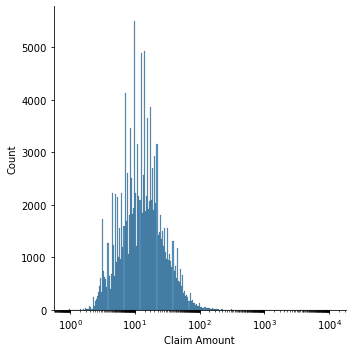

In [27]:
# Check for extreme values

sns.displot(df['Claim Amount'], log_scale = 100)

<AxesSubplot:xlabel='Close Amount', ylabel='Count'>

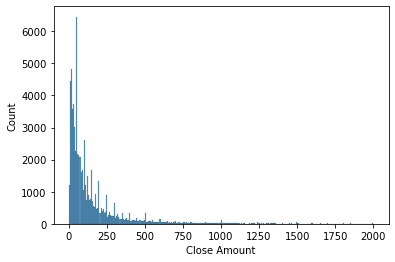

In [65]:
# Check for extreme values

sns.histplot(df['Close Amount'], binrange = (1, 2000))

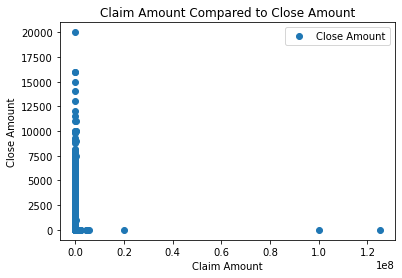

In [74]:
# Create scatterplot using matplotlib

df.plot(x = 'Claim Amount', y='Close Amount',style='o')
plt.title('Claim Amount Compared to Close Amount')  
plt.xlabel('Claim Amount')  
plt.ylabel('Close Amount')  
plt.show()

# 5) State hypothesis

 # There is no correlation between the Claim Amount and Close Amount

# 6) Reshape the variables into NumPy arrays

In [75]:
X = df['Claim Amount'].values.reshape(-1,1)
y = df['Close Amount'].values.reshape(-1,1)

In [70]:
X

array([[  75.  ],
       [2270.09],
       [4457.29],
       ...,
       [ 149.99],
       [  46.51],
       [ 106.99]])

In [71]:
y

array([[ 75.  ],
       [  0.  ],
       [  0.  ],
       ...,
       [149.99],
       [ 46.51],
       [106.99]])

# 7) Split the data into two sets

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# 8) Run a linear regression on the data

In [80]:
# Create regression object

regression = LinearRegression()

In [81]:
# Fit regression object to the training set

regression.fit(X_train, y_train)

LinearRegression()

In [82]:
# Predict the values of y using X

y_predicted = regression.predict(X_test)

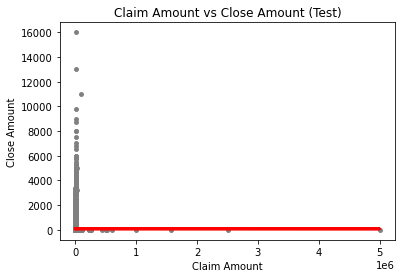

In [86]:
# Create a plot showing the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth = 3)
plot_test.title('Claim Amount vs Close Amount (Test)')
plot_test.xlabel('Claim Amount')
plot_test.ylabel('Close Amount')
plot_test.show()

In [87]:
# Create objects containing the model summary statistics

rmse = mean_squared_error(y_test, y_predicted) # Mean Squared Error
r2 = r2_score(y_test, y_predicted) # R2 score 

In [90]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:', regression.coef_)
print('Mean squared error:', rmse)
print('R2 score:', r2)

Slope: [[-4.0741424e-07]]
Mean squared error: 88862.25425548338
R2 score: -2.2154636038829167e-05


In [91]:
y_predicted

array([[91.808747  ],
       [91.80850334],
       [91.8079468 ],
       ...,
       [91.80874125],
       [91.80868015],
       [91.80873148]])

In [93]:
# Create a dataframe comparing the actual and predicted values of y

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(50)

,Actual,Predicted
0,0.00,91.808747
1,0.00,91.808503
2,0.00,91.807947
3,0.00,91.808749
4,0.00,91.808693
5,0.00,91.808711
6,313.20,91.808506
7,8.35,91.808758
8,0.00,91.808731
9,0.00,91.808101


# Compare regression fit to training set

In [94]:
y_predicted_train = regression.predict(X_train) # Predict X_train

In [95]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [96]:
print('Slope:', regression.coef_)
print('Mean squared error:', rmse)
print('R2 score:', r2)

Slope: [[-4.0741424e-07]]
Mean squared error: 90529.47870768848
R2 score: 4.916228720786009e-07


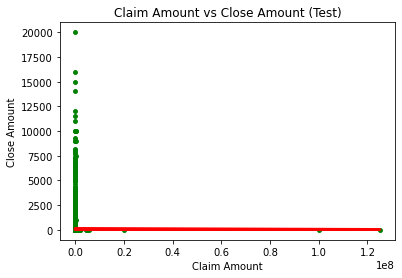

In [97]:
# Visualize training set results

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth = 3)
plot_test.title('Claim Amount vs Close Amount (Test)')
plot_test.xlabel('Claim Amount')
plot_test.ylabel('Close Amount')
plot_test.show()

# Both plots are very similar. The slopes are completely horizontal, meaning no correlation between the two variables.

# In fact, the slope is negative suggesting negative correlation between the two.

# The MSE is 90,529, suggesting a regression line is a poor fit.

# Finally, the R2 is extremely close to zero, reinforcing that this model is a poor fit.